It is highly recommended to use a powerful **GPU**, you can use it for free uploading this notebook to [Google Colab](https://colab.research.google.com/notebooks/intro.ipynb).
<table align="center">
 <td align="center"><a target="_blank" href="https://colab.research.google.com/github/ezponda/intro_deep_learning/blob/main/class/Fundamentals/Prevent_Overfitting.ipynb">
        <img src="https://colab.research.google.com/img/colab_favicon_256px.png"  width="50" height="50" style="padding-bottom:5px;" />Run in Google Colab</a></td>
  <td align="center"><a target="_blank" href="https://github.com/ezponda/intro_deep_learning/blob/main/class/Fundamentals/Prevent_Overfitting.ipynb">
        <img src="https://github.githubassets.com/images/modules/logos_page/GitHub-Mark.png"  width="50" height="50" style="padding-bottom:5px;" />View Source on GitHub</a></td>
</table>

# Prevent Overfitting: Regularization


In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
tf.random.set_seed(0)

We will use the [MNIST dataset](https://en.wikipedia.org/wiki/MNIST_database), consisting of a collection of 28x28 pixel images corresponding in digits from 0 to 9 manuscripts. The purpose of this data set is to train models that recognize handwritten numbers.

We will train, therefore, an [OCR (Optical Character Recognition)](https://en.wikipedia.org/wiki/Optical_character_recognition) model for multiclass classification (numbers from 0 to 9).

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
x_train[0].shape

(28, 28)

As they are 8-bit images, the colors (in this case only one channel, the gray channel) of each pixel are encoded with a value between 0 and 255, with 0 being black and 255 being white. It is usual to normalize the values to work with a range between 0.0 and 1.0.

In [4]:
x_train, x_test = x_train / 255.0, x_test / 255.0

We visualize a random image of the training set.

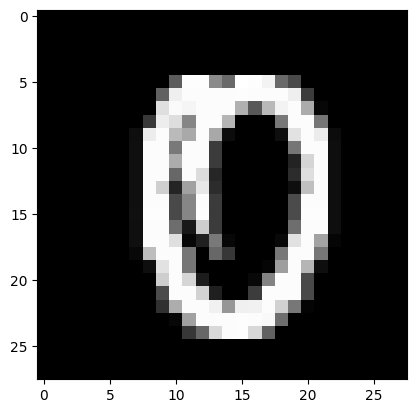

In [8]:
import numpy as np

i = np.random.randint(0, len(x_train))
plt.imshow(x_train[i], cmap='gray')
plt.show()

We reduce the dataset for  inducing more overfitting

In [9]:
from sklearn.model_selection import train_test_split
# split into train test sets
_, x, _, y = train_test_split(
    x_train, y_train, test_size=0.02, random_state=1, stratify=y_train)

num_classes = 10
from collections import Counter
x.shape, y.shape, Counter(y)

((1200, 28, 28),
 (1200,),
 Counter({np.uint8(2): 119,
          np.uint8(8): 117,
          np.uint8(6): 118,
          np.uint8(9): 119,
          np.uint8(3): 123,
          np.uint8(4): 117,
          np.uint8(0): 119,
          np.uint8(7): 125,
          np.uint8(5): 108,
          np.uint8(1): 135}))

#### Why do we need to use regularization?

We are going to assign the classes randomly to each image with random shuffle.

In [10]:
y_shuffle = np.copy(y)
np.random.shuffle(y_shuffle)
y[:5], y_shuffle[:5]

(array([2, 8, 6, 9, 3], dtype=uint8), array([1, 4, 0, 3, 5], dtype=uint8))

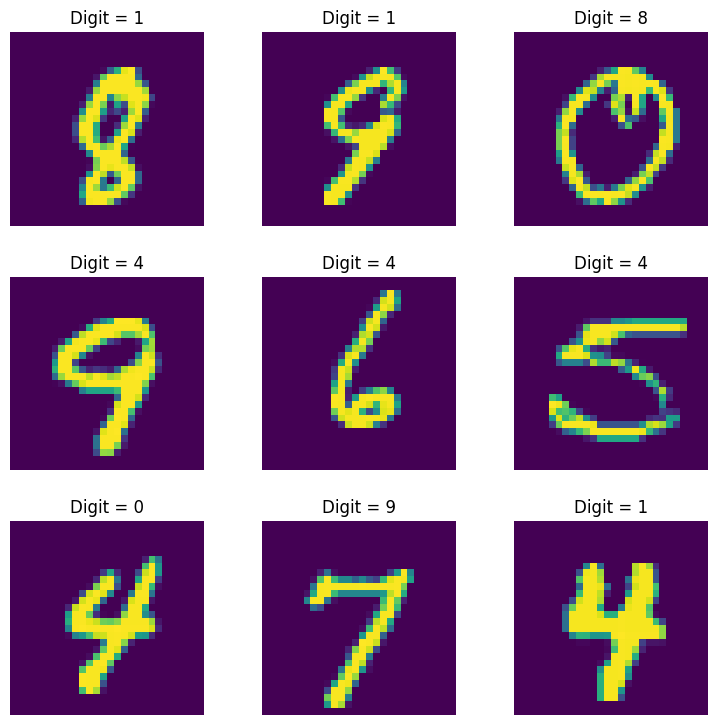

In [11]:
fig, axes = plt.subplots(3, 3, figsize=(9, 9))
axes = axes.ravel()

for i in np.arange(0, 9):
    ind = np.random.randint(len(y_shuffle))
    axes[i].imshow(x[ind].reshape(28, 28))
    axes[i].set_title(
        f"Digit = {y_shuffle[ind]}")
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.3)

Lets build a model for learning the new random classes

In [12]:
# Input
inputs = tf.keras.Input(shape=(28, 28))
# Convert the 2D image to a vector
flat = layers.Flatten()(inputs)

# hidden layer 1
l_1 = layers.Dense(64, activation='relu')(flat)
# hidden layer 2
l_2 = layers.Dense(64, activation='relu')(l_1)
# hidden layer 3
l_3 = layers.Dense(64, activation='relu')(l_2)

# Outputs
outputs = layers.Dense(10, activation='softmax')(l_3)

# Model definition
model = keras.Model(inputs=inputs, outputs=outputs)

In [13]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(
    x,
    y_shuffle,
    batch_size=64,
    epochs=100,
    shuffle=True
)

Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0844 - loss: 2.3256
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1358 - loss: 2.2780 
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2023 - loss: 2.2417 
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2353 - loss: 2.1972 
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2401 - loss: 2.1511 
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2764 - loss: 2.0922
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2954 - loss: 2.0204 
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3450 - loss: 1.9377 
Epoch 9/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3701 - loss: 1.8428 
Epoch 10/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4063 - loss: 1.7455 
Epoch 11/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4528 - loss: 1.6354 
Epoch 12/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - 

In [14]:
results = model.evaluate(x, y_shuffle, verbose=0)
print('Train Accuracy: {}'.format(results[1]))

Train Accuracy: 1.0


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


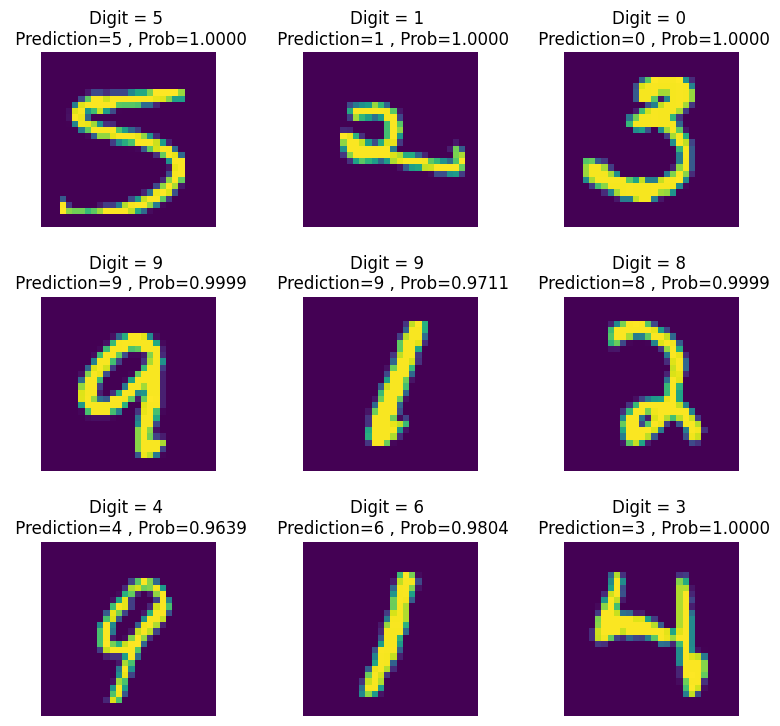

In [15]:
fig, axes = plt.subplots(3, 3, figsize=(9, 9))
axes = axes.ravel()

for i in np.arange(0, 9):
    ind = np.random.randint(len(y_shuffle))
    pred_pobs = model.predict(np.expand_dims(x[ind], 0)).flatten()
    pred_class = np.argmax(pred_pobs)
    prob = np.max(pred_pobs)
    axes[i].imshow(x[ind].reshape(28, 28))
    axes[i].set_title(
        f"Digit = {y_shuffle[ind]} \n Prediction={pred_class} , Prob={prob:.4f}")
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)

We can see that the model has fully fitted the training set. It practically does not matter what data you introduce into the neural network, it will almost always fit. The objective is not to fit the training set, it is to **GENERALIZE**.

#### Regularization for preventing overfitting

To get the model to **generalize**, we can use one of the numerous regularization techniques

We build a model consisting of:

- Input with dimension (28,28)
- Flatten layer
- Dense hidden  layer with 256 neurons and ReLU as activation function
- Second dense hidden layer with 128 neurons and ReLU as activation function
- Third dense  hidden layer with 128 neurons and ReLU as activation function
- Output layer with a single neuron that implements the sigmoid function.

In [16]:
# Input
inputs = tf.keras.Input(shape=(28,28), name='input_layer')
# Convert the 2D image to a vector
flat = layers.Flatten()(inputs)

# hidden layer 1
l_1 = layers.Dense(256, activation='relu', name='layer_1')(flat)
# hidden layer 2
l_2 = layers.Dense(128, activation='relu', name='layer_2')(l_1)
# hidden layer 3
l_3 = layers.Dense(128, activation='relu', name='layer_3')(l_2)

# Outputs
outputs = layers.Dense(num_classes, activation='softmax', name='output_layer')(l_3)

# Model definition
model = keras.Model(inputs=inputs, outputs=outputs, name='dont_overfit_model')

In [17]:
model.summary()

Model: "dont_overfit_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_1 (Dense)                 │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_3 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 251,658 (983.04 KB)

 Trainable params: 251,658 (983.04 KB)

 Non-trainable params: 0 (0.00 B)

We define the following configuration for training:
- **optimizer**: adam
- **loss function**: binary crossentropy
- **metrics**: accuracy

In [18]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
history = model.fit(
    x,
    y,
    batch_size=64,
    epochs=100,
    validation_split=0.2,
    shuffle=True
)

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.3249 - loss: 2.0694 - val_accuracy: 0.7125 - val_loss: 1.1540
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7704 - loss: 0.8898 - val_accuracy: 0.8417 - val_loss: 0.5374
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8791 - loss: 0.4059 - val_accuracy: 0.8583 - val_loss: 0.4678
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9278 - loss: 0.2459 - val_accuracy: 0.8625 - val_loss: 0.5059
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9328 - loss: 0.1990 - val_accuracy: 0.8792 - val_loss: 0.4144
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9575 - loss: 0.1507 - val_accuracy: 0.8667 - val_loss: 0.4315
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9573 - loss: 0.1390 - val_accuracy: 0.8917 - val_loss: 0.3676
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9825 - loss: 0.0957 - val_accuracy: 0.920

In [20]:
results = model.evaluate(x_test, y_test, verbose=0)
print('Test Loss: {}'.format(results[0]))
print('Test Accuracy: {}'.format(results[1]))

Test Loss: 0.5461183190345764
Test Accuracy: 0.9093000292778015


We visualize the evolution of the values in each epoch of the loss function and accuracy.

In [21]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

In [22]:
hist.head()

,accuracy,loss,val_accuracy,val_loss,epoch
0,0.467708,1.836076,0.712500,1.153968,0
1,0.786458,0.750731,0.841667,0.537373,1
2,0.890625,0.367067,0.858333,0.467825,2
3,0.933333,0.230318,0.862500,0.505896,3
4,0.935417,0.193466,0.879167,0.414425,4


<a id='overfitting_results'></a>
When interpreting both graphs, it is evident that the model over-fits the training values and is not able to generalize well for the validation values. **It is a clear example of overfitting**.

The following function will be useful throughout the different practical examples.

In [23]:
import matplotlib.pyplot as plt

def show_loss_accuracy_evolution(history):

    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Categorical Crossentropy')
    ax1.plot(hist['epoch'], hist['loss'], label='Train Error')
    ax1.plot(hist['epoch'], hist['val_loss'], label = 'Val Error')
    ax1.grid()
    ax1.legend()

    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.plot(hist['epoch'], hist['accuracy'], label='Train Accuracy')
    ax2.plot(hist['epoch'], hist['val_accuracy'], label = 'Val Accuracy')
    ax2.grid()
    ax2.legend()

    plt.show()

def show_samples(x_test, y_test, model):
    predictions = model.predict(x_test)
    predicted_classes = np.argmax(predictions, -1)

    L = 5
    W = 5
    fig, axes = plt.subplots(L, W, figsize=(14, 14))
    axes = axes.ravel()

    for i in np.arange(0, L * W):
        ind = np.random.randint(len(y_test))
        axes[i].imshow(x_test[ind].reshape(28, 28))
        prob_pred = np.max(predictions[ind, :])
        class_pred = int(predicted_classes[ind])
        original_class = int(y_test[ind])
        if class_pred == original_class:
            color = 'green'
        else:
            color = 'red'
        title = "Pred: {0} \n Target: {1} \n Prob: {2:.3f}".format(
        class_pred, original_class, prob_pred)
        axes[i].set_title(title, color=color)
        axes[i].axis('off')

    plt.subplots_adjust(wspace=0.5)

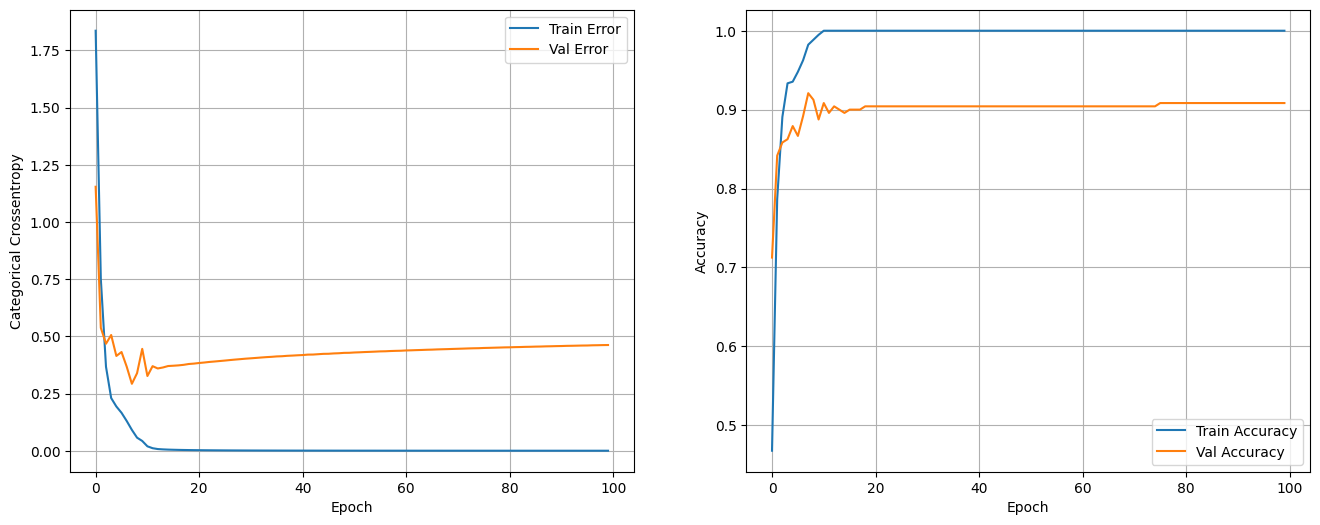

In [24]:
show_loss_accuracy_evolution(history)

In [25]:
results = model.evaluate(x_test, y_test, verbose=0)
print('Test Loss: {}'.format(results[0]))
print('Test Accuracy: {}'.format(results[1]))

Test Loss: 0.5461183190345764
Test Accuracy: 0.9093000292778015


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


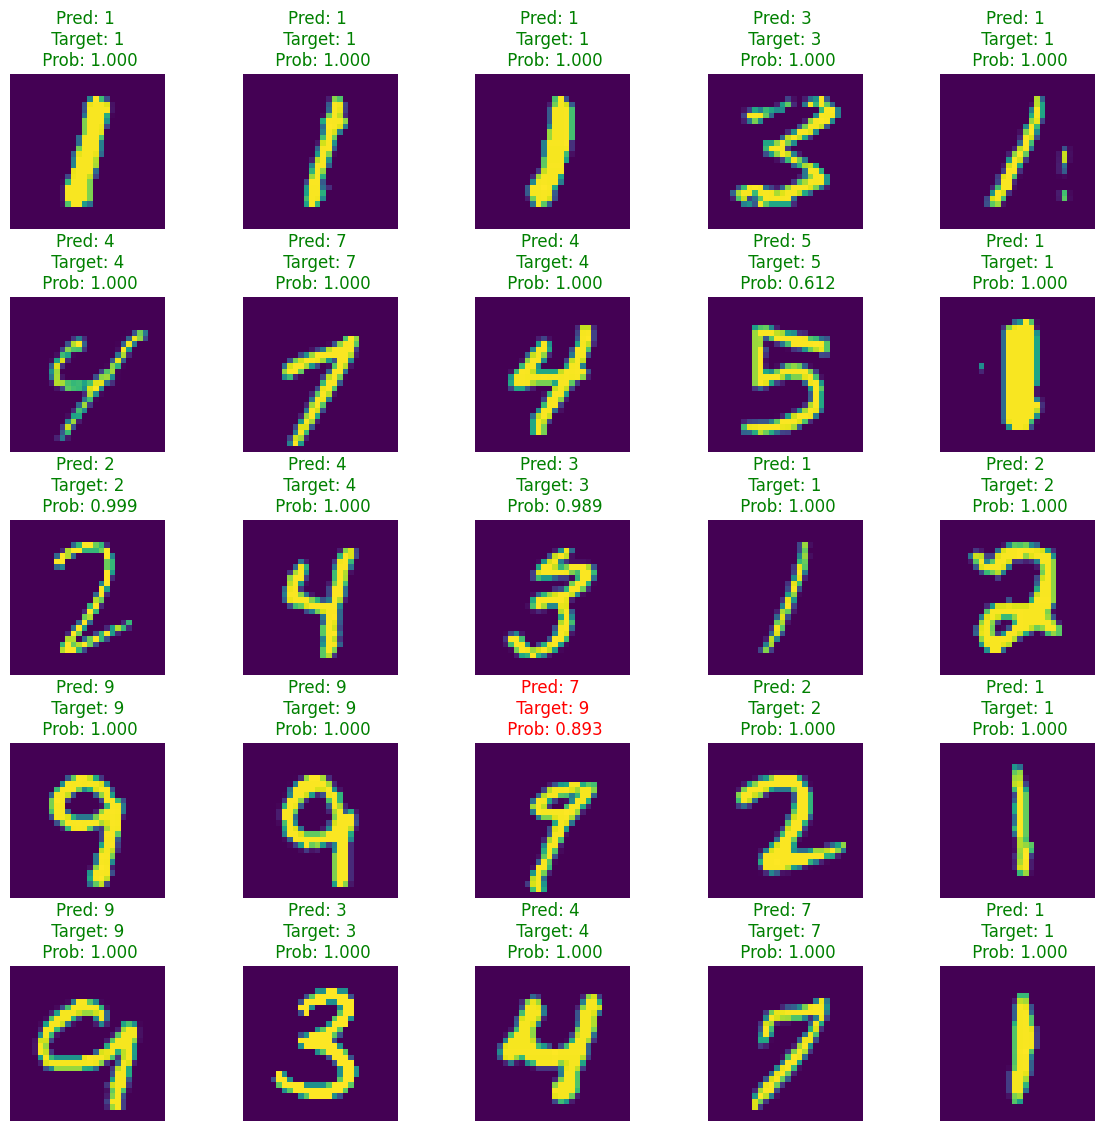

In [26]:
show_samples(x_test, y_test, model)

## Create a simpler model

The simplest way to prevent overfitting is to create  a simple model: A model with less number of  parameters (which is determined by the number of layers and the number of units per layer).

A more complex model with more parameters will have much more capacity and will be able to learn almost any training set. Deep learning models tend to be good at fitting to the training data, but the real challenge is generalization, not fitting.

In [27]:
# Input layer
inputs = tf.keras.Input(shape=(28, 28), name='input_layer')
flat = layers.Flatten()(inputs)

# First hidden layer
l_1 = layers.Dense(8, activation='relu', name='layer_1')(flat)

# Output layer
outputs = layers.Dense(num_classes, activation='softmax',
                       name='output_layer')(l_1)
model_simpler = keras.Model(
    inputs=inputs, outputs=outputs, name='simpler_model')

model_simpler.summary()

Model: "simpler_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_1 (Dense)                 │ (None, 8)              │         6,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 10)             │            90 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,370 (24.88 KB)

 Trainable params: 6,370 (24.88 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
model_simpler.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])
history_simpler = model_simpler.fit(x,
                                    y,
                                    batch_size=64,
                                    epochs=100,
                                    validation_split=0.25,
                                    shuffle=True)

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.1014 - loss: 2.3305 - val_accuracy: 0.1800 - val_loss: 2.1589
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1909 - loss: 2.0830 - val_accuracy: 0.2600 - val_loss: 1.9631
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2795 - loss: 1.8692 - val_accuracy: 0.3633 - val_loss: 1.7876
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3402 - loss: 1.6929 - val_accuracy: 0.4100 - val_loss: 1.6510
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4077 - loss: 1.5506 - val_accuracy: 0.4733 - val_loss: 1.5336
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4910 - loss: 1.4321 - val_accuracy: 0.5800 - val_loss: 1.4323
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5876 - loss: 1.3238 - val_accuracy: 0.6300 - val_loss: 1.3335
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6291 - loss: 1.2224 - val_accuracy: 0.6733 -

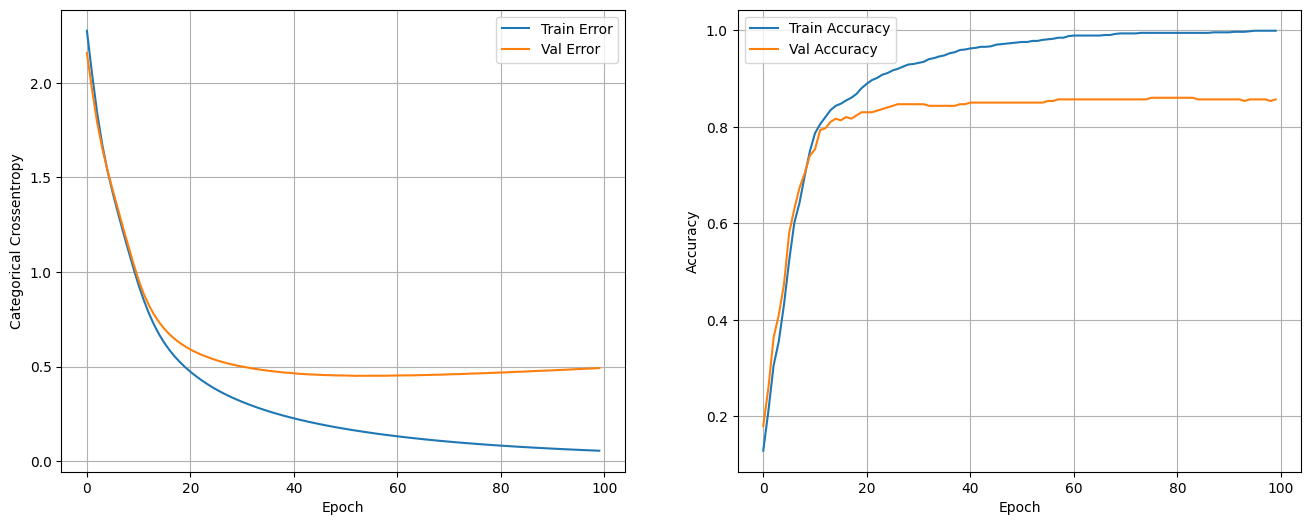

In [29]:
show_loss_accuracy_evolution(history_simpler)

In [30]:
results = model_simpler.evaluate(x_test, y_test, verbose=0)
print('Test Loss: {}'.format(results[0]))
print('Test Accuracy: {}'.format(results[1]))

Test Loss: 0.5480462908744812
Test Accuracy: 0.8586999773979187


## Reduce batch_size

Other method is decreasing the `batch_size`during the gradient descend to add more uncertainty to the estimation of the parameter gradients, thus reducing the capacity of the model

In [31]:
# Input
inputs = tf.keras.Input(shape=(28,28), name='input_layer')
# Convert the 2D image to a vector
flat = layers.Flatten()(inputs)

# hidden layer 1
l_1 = layers.Dense(256, activation='relu', name='layer_1')(flat)
# hidden layer 2
l_2 = layers.Dense(128, activation='relu', name='layer_2')(l_1)
# hidden layer 3
l_3 = layers.Dense(128, activation='relu', name='layer_3')(l_2)

# Outputs
outputs = layers.Dense(num_classes, activation='softmax', name='output_layer')(l_3)

# Model definition
model = keras.Model(inputs=inputs, outputs=outputs, name='dont_overfit_model')
## same model
model.summary()

Model: "dont_overfit_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_1 (Dense)                 │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_3 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 251,658 (983.04 KB)

 Trainable params: 251,658 (983.04 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history_2 = model.fit(
    x,
    y,
    batch_size=16,
    epochs=100,
    validation_split=0.2,
    shuffle=True
)


Epoch 1/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.4373 - loss: 1.7236 - val_accuracy: 0.8708 - val_loss: 0.4646
Epoch 2/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8535 - loss: 0.4703 - val_accuracy: 0.8875 - val_loss: 0.4099
Epoch 3/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9246 - loss: 0.2309 - val_accuracy: 0.9000 - val_loss: 0.3674
Epoch 4/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9649 - loss: 0.1239 - val_accuracy: 0.8875 - val_loss: 0.4107
Epoch 5/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9926 - loss: 0.0631 - val_accuracy: 0.8708 - val_loss: 0.5013
Epoch 6/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9925 - loss: 0.0424 - val_accuracy: 0.9000 - val_loss: 0.3906
Epoch 7/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 1.0000 - loss: 0.0160 - val_accuracy: 0.8958 - val_loss: 0.4335
Epoch 8/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 0.0070 - val_accuracy: 0.9000 - 

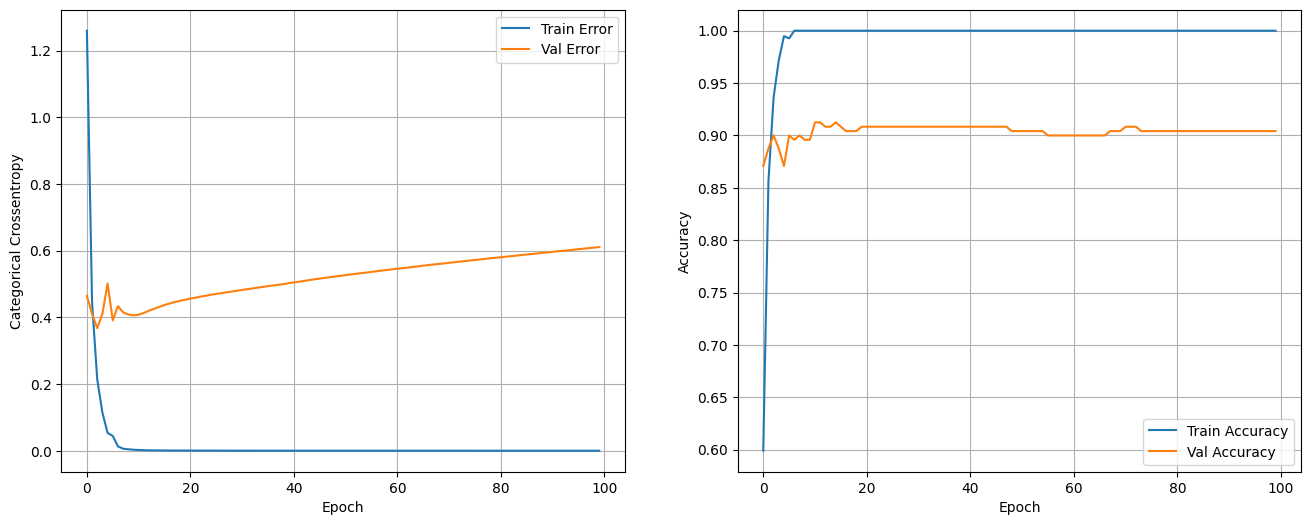

In [33]:
show_loss_accuracy_evolution(history_2)

In [34]:
results = model.evaluate(x_test, y_test, verbose=0)
print('Test Loss: {}'.format(results[0]))
print('Test Accuracy: {}'.format(results[1]))

Test Loss: 0.6179956197738647
Test Accuracy: 0.9138000011444092


### Question 1:
#### What differences do you see if you change the batch_size to a lower or higher value? For example to 1 and to 512

In [35]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history_stochastic = model.fit(
    x,
    y,
    batch_size=1,
    epochs=100,
    validation_split=0.2,
    shuffle=True
)

Epoch 1/100
960/960 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9035 - loss: 0.4931 - val_accuracy: 0.8625 - val_loss: 0.6017
Epoch 2/100
960/960 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9503 - loss: 0.1906 - val_accuracy: 0.8083 - val_loss: 0.6436
Epoch 3/100
960/960 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9660 - loss: 0.1072 - val_accuracy: 0.8667 - val_loss: 0.7218
Epoch 4/100
960/960 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9507 - loss: 0.1746 - val_accuracy: 0.8958 - val_loss: 0.5478
Epoch 5/100
960/960 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9241 - loss: 0.2561 - val_accuracy: 0.8958 - val_loss: 0.4950
Epoch 6/100
960/960 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9786 - loss: 0.0921 - val_accuracy: 0.9042 - val_loss: 0.4740
Epoch 7/100
960/960 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9849 - loss: 0.0486 - val_accuracy: 0.9083 - val_loss: 0.4342
Epoch 8/100
960/960 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9840 - loss: 0.0786 - val_accu

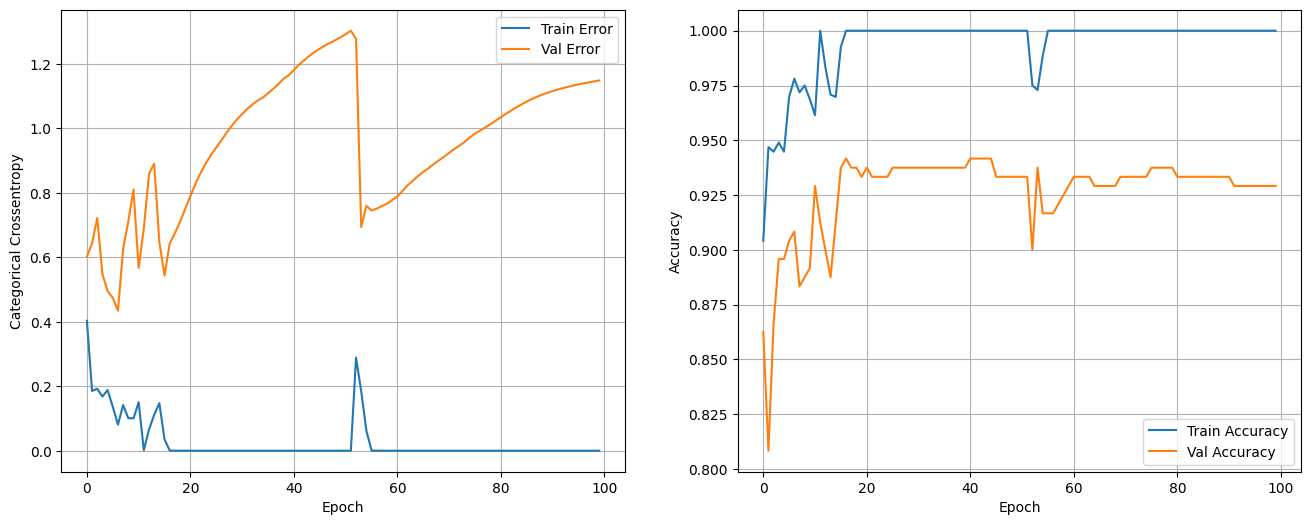

In [36]:
show_loss_accuracy_evolution(history_stochastic)
## el overfitting empeora al bajar el bactch_size a 1

In [38]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history_3 = model.fit(
    x,
    y,
    batch_size=512,
    epochs=100,
    validation_split=0.2,
    shuffle=True
)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 402ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.9292 - val_loss: 1.1482
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.9292 - val_loss: 1.1482
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.9292 - val_loss: 1.1482
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.9292 - val_loss: 1.1482
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.9292 - val_loss: 1.1482
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.9292 - val_loss: 1.1482
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.9292 - val_loss: 1.1482
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 1.0000 - loss: 0.0000e+

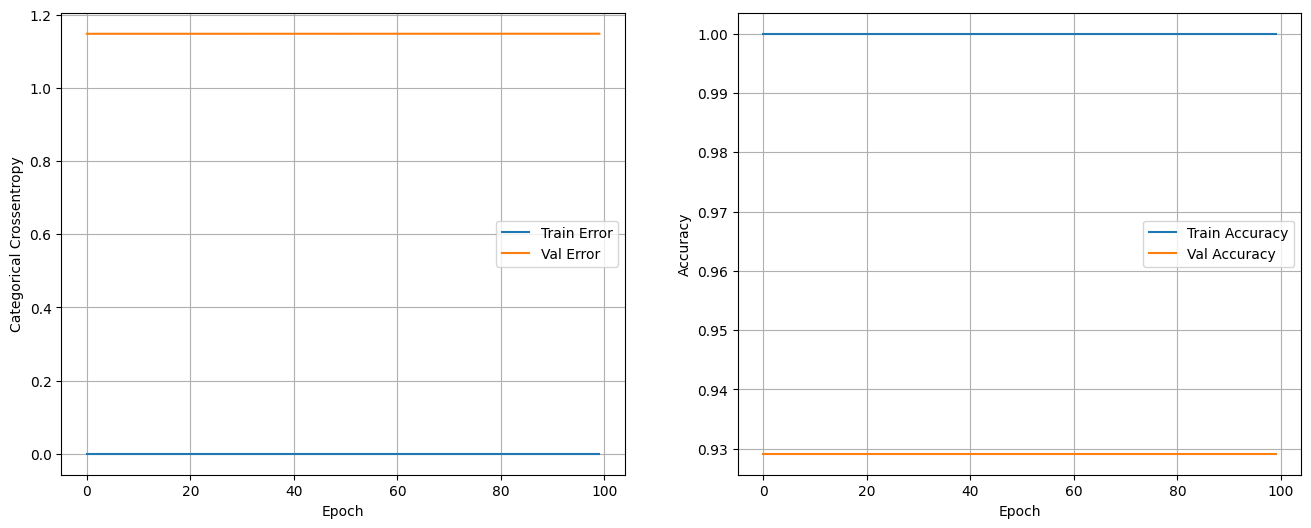

In [39]:
show_loss_accuracy_evolution(history_3)
# problema de overfitting grave

<a id='dropout'></a>
## Dropout

Dropout, applied to a layer, consists of randomly "dropping out" (set to zero) a number of output features of the layer during training with a probability **p** (`dropout rate`).

In `keras` you can introduce dropout in a network via the [Dropout layer](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout), which gets applied to the output of layer right before.

```python
tf.keras.layers.Dropout(
    rate, noise_shape=None, seed=None, **kwargs
)
```

With Functional API:
```python
next_layer = layers.Dropout(0.4)(prev_layer)
```
With Sequential:
```python
model.add(layers.Dropout(0.4))
```

In [40]:
# Input
inputs = tf.keras.Input(shape=(28, 28), name='input_layer')
# Convert the 2D image to a vector
flat = layers.Flatten()(inputs)

flat = layers.Dropout(0.5, name='dropout_flat')(flat)
# hidden layer 1
l_1 = layers.Dense(256, activation='relu', name='layer_1')(flat)
l_1 = layers.Dropout(0.5, name='dropout_l1')(l_1)
# hidden layer 2
l_2 = layers.Dense(128, activation='relu', name='layer_2')(l_1)
l_2 = layers.Dropout(0.5, name='dropout_l2')(l_2)
# hidden layer 3
l_3 = layers.Dense(128, activation='relu', name='layer_3')(l_2)
l_3 = layers.Dropout(0.5, name='dropout_l3')(l_3)

# Outputs
outputs = layers.Dense(num_classes, activation='softmax',
                       name='output_layer')(l_3)


model_dropout = keras.Model(
    inputs=inputs, outputs=outputs, name='dont_overfit_model_dropout')

In [41]:
model_dropout.summary()

Model: "dont_overfit_model_dropout"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_flat (Dropout)          │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_1 (Dense)                 │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_l1 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_l2 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_3 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_l3 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 251,658 (983.04 KB)

 Trainable params: 251,658 (983.04 KB)

 Non-trainable params: 0 (0.00 B)

In [42]:
model_dropout.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

In [43]:
history_dropout = model_dropout.fit(
    x,
    y,
    batch_size=64,
    epochs=100,
    validation_split=0.2,
    shuffle=True
)

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.1131 - loss: 2.5507 - val_accuracy: 0.2083 - val_loss: 2.2375
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.1674 - loss: 2.2882 - val_accuracy: 0.4417 - val_loss: 2.1747
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.1876 - loss: 2.1963 - val_accuracy: 0.5417 - val_loss: 2.0571
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2273 - loss: 2.0939 - val_accuracy: 0.5750 - val_loss: 1.8441
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3376 - loss: 1.9341 - val_accuracy: 0.6750 - val_loss: 1.5757
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3747 - loss: 1.7504 - val_accuracy: 0.7250 - val_loss: 1.2951
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3996 - loss: 1.6282 - val_accuracy: 0.7917 - val_loss: 1.0574
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4838 - loss: 1.5116 - val_accuracy: 0.

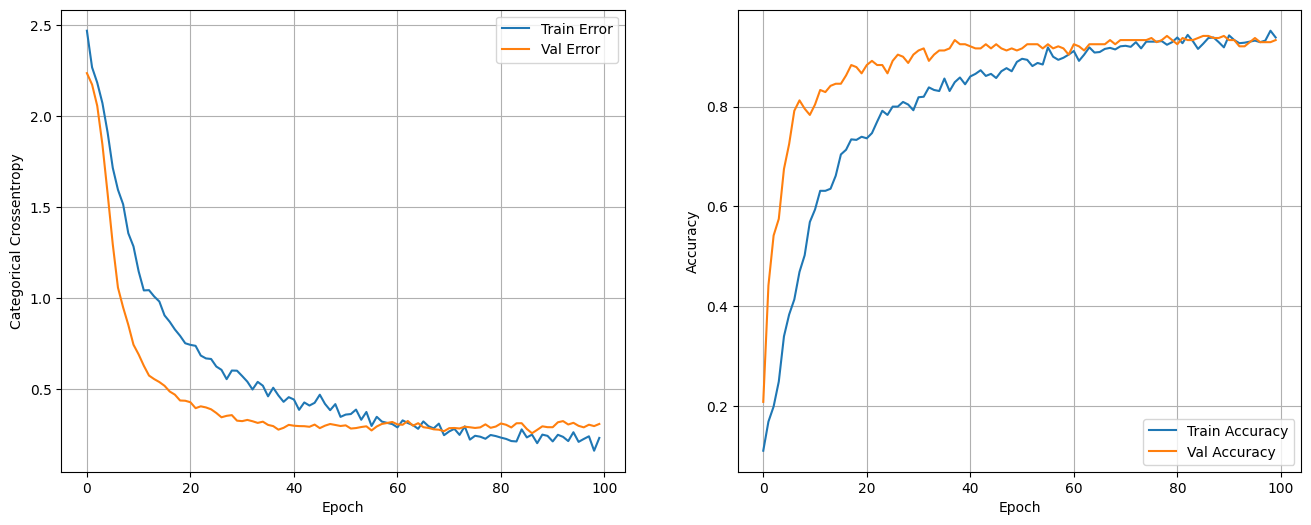

In [44]:
show_loss_accuracy_evolution(history_dropout)

In [45]:
results = model_dropout.evaluate(x_test, y_test, verbose=0)
print('Test Loss: {}'.format(results[0]))
print('Test Accuracy: {}'.format(results[1]))

Test Loss: 0.31817421317100525
Test Accuracy: 0.9192000031471252


### Question 2:
#### What happens if you change the dropout to 0.1 or 0.9? And what if you put it only on one layer?
#### What happens if we delete the flatten first dropout?

In [46]:
## dropout 0.1
# Input
inputs = tf.keras.Input(shape=(28, 28), name='input_layer')
# Convert the 2D image to a vector
flat = layers.Flatten()(inputs)

flat = layers.Dropout(0.1, name='dropout_flat')(flat)
# hidden layer 1
l_1 = layers.Dense(256, activation='relu', name='layer_1')(flat)
l_1 = layers.Dropout(0.1, name='dropout_l1')(l_1)
# hidden layer 2
l_2 = layers.Dense(128, activation='relu', name='layer_2')(l_1)
l_2 = layers.Dropout(0.1, name='dropout_l2')(l_2)
# hidden layer 3
l_3 = layers.Dense(128, activation='relu', name='layer_3')(l_2)
l_3 = layers.Dropout(0.1, name='dropout_l3')(l_3)

# Outputs
outputs = layers.Dense(num_classes, activation='softmax',
                       name='output_layer')(l_3)


model_dropout_1 = keras.Model(
    inputs=inputs, outputs=outputs, name='dont_overfit_model_dropout_1')

In [47]:
model_dropout_1.summary()

Model: "dont_overfit_model_dropout_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_flat (Dropout)          │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_1 (Dense)                 │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_l1 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_l2 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_3 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_l3 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 251,658 (983.04 KB)

 Trainable params: 251,658 (983.04 KB)

 Non-trainable params: 0 (0.00 B)

In [48]:
model_dropout_1.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

In [49]:
history_dropout_1 = model_dropout_1.fit(
    x,
    y,
    batch_size=64,
    epochs=100,
    validation_split=0.2,
    shuffle=True
)

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.2736 - loss: 2.1093 - val_accuracy: 0.7542 - val_loss: 1.2328
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6892 - loss: 1.1311 - val_accuracy: 0.8167 - val_loss: 0.6143
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8076 - loss: 0.6128 - val_accuracy: 0.8667 - val_loss: 0.4607
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8553 - loss: 0.4653 - val_accuracy: 0.8750 - val_loss: 0.4085
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8937 - loss: 0.3245 - val_accuracy: 0.8958 - val_loss: 0.3609
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9081 - loss: 0.2704 - val_accuracy: 0.9000 - val_loss: 0.3266
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9393 - loss: 0.1828 - val_accuracy: 0.9000 - val_loss: 0.3227
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9654 - loss: 0.1445 - val_accuracy: 0.

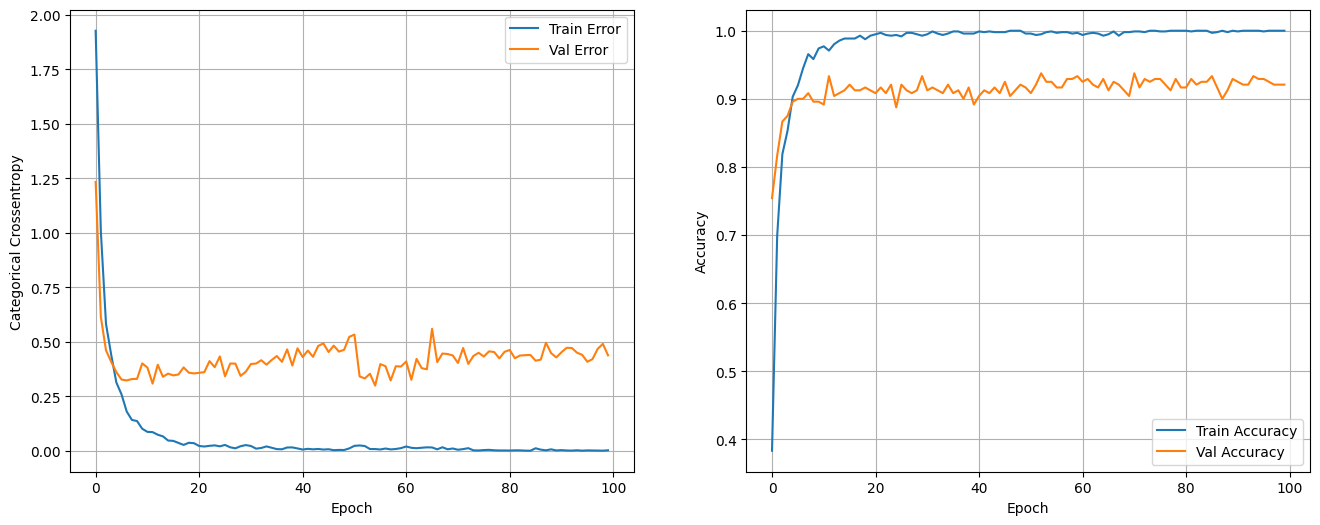

In [50]:
show_loss_accuracy_evolution(history_dropout_1)
## Resultado: aumenta el overfitting al reducir el dropout de 0.5 a 0.1
## aumenta la funcion de perdida, mayor desviacion entre valores reales y predichos
## Sin embargo el accuracy aumento levemente

In [51]:
results = model_dropout_1.evaluate(x_test, y_test, verbose=0)
print('Test Loss: {}'.format(results[0]))
print('Test Accuracy: {}'.format(results[1]))

Test Loss: 0.5011714100837708
Test Accuracy: 0.9218000173568726


In [53]:
## dropout 0.9
# Input
inputs = tf.keras.Input(shape=(28, 28), name='input_layer')
# Convert the 2D image to a vector
flat = layers.Flatten()(inputs)

flat = layers.Dropout(0.9, name='dropout_flat')(flat)
# hidden layer 1
l_1 = layers.Dense(256, activation='relu', name='layer_1')(flat)
l_1 = layers.Dropout(0.9, name='dropout_l1')(l_1)
# hidden layer 2
l_2 = layers.Dense(128, activation='relu', name='layer_2')(l_1)
l_2 = layers.Dropout(0.9, name='dropout_l2')(l_2)
# hidden layer 3
l_3 = layers.Dense(128, activation='relu', name='layer_3')(l_2)
l_3 = layers.Dropout(0.9, name='dropout_l3')(l_3)

# Outputs
outputs = layers.Dense(num_classes, activation='softmax',
                       name='output_layer')(l_3)


model_dropout_9 = keras.Model(
    inputs=inputs, outputs=outputs, name='dont_overfit_model_dropout_9')

In [54]:
model_dropout_9.summary()

Model: "dont_overfit_model_dropout_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_flat (Dropout)          │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_1 (Dense)                 │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_l1 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_l2 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_3 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_l3 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 251,658 (983.04 KB)

 Trainable params: 251,658 (983.04 KB)

 Non-trainable params: 0 (0.00 B)

In [55]:
model_dropout_9.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

In [56]:
history_dropout_9 = model_dropout_9.fit(
    x,
    y,
    batch_size=64,
    epochs=100,
    validation_split=0.2,
    shuffle=True
)

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.1228 - loss: 27.2234 - val_accuracy: 0.0708 - val_loss: 2.3050
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.0814 - loss: 23.1299 - val_accuracy: 0.0875 - val_loss: 2.3038
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.0876 - loss: 18.9234 - val_accuracy: 0.0875 - val_loss: 2.3075
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.1049 - loss: 15.5122 - val_accuracy: 0.0667 - val_loss: 2.3080
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.1027 - loss: 14.1955 - val_accuracy: 0.0792 - val_loss: 2.3076
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.1169 - loss: 11.0899 - val_accuracy: 0.0833 - val_loss: 2.3076
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.0946 - loss: 10.1211 - val_accuracy: 0.0625 - val_loss: 2.3078
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.0889 - loss: 9.7067 - val_accur

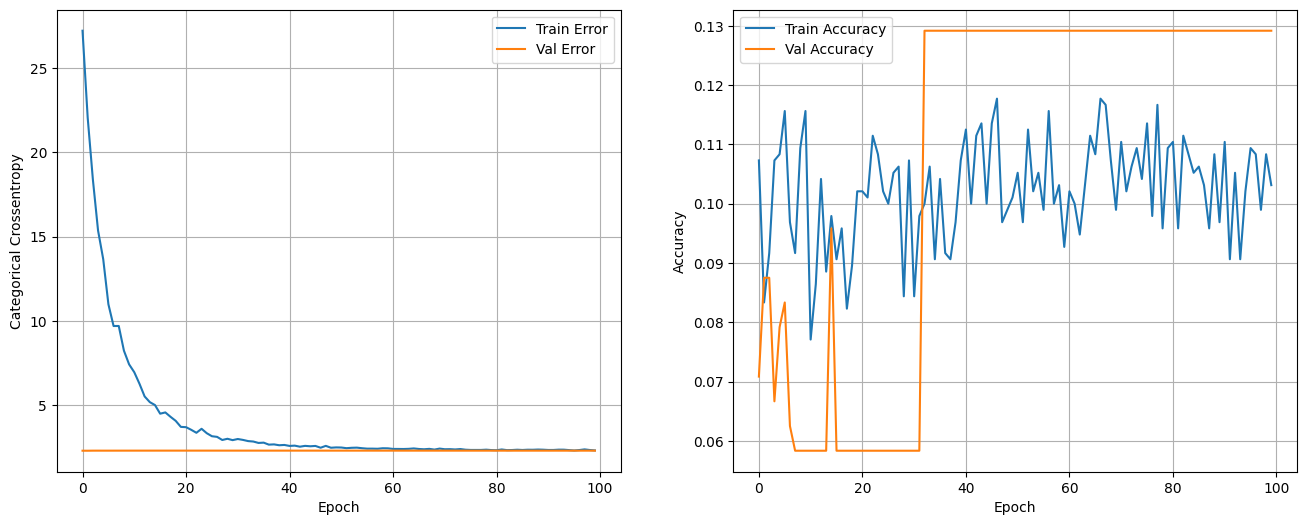

In [57]:
show_loss_accuracy_evolution(history_dropout_9)
## Resultado: disminuye el overfitting al incrementar el dropout de 0.5 a 0.9
## aumenta extremamente la funcion de perdida, mayor desviacion entre valores reales y predichos
## el accuracy cae por los suelos, esto refleja una malisima capacidad de prediccion

In [58]:
results = model_dropout_9.evaluate(x_test, y_test, verbose=0)
print('Test Loss: {}'.format(results[0]))
print('Test Accuracy: {}'.format(results[1]))

Test Loss: 2.3024346828460693
Test Accuracy: 0.11349999904632568


## Batch Normalization

[Batch normalization](https://www.tensorflow.org/api_docs/python/tf/keras/layers/BatchNormalization) applies a transformation that maintains the mean output close to 0 and the output standard deviation close to 1.


With Functional API:
```python
next_layer = layers.BatchNormalization()(prev_layer)
```
With Sequential:
```python
model.add(layers.BatchNormalization())
```

In [59]:
# Input
inputs = tf.keras.Input(shape=(28, 28), name='input_layer')
# Convert the 2D image to a vector
flat = layers.Flatten()(inputs)

# hidden layer 1
l_1 = layers.Dense(256, activation='relu', name='layer_1')(flat)
l_1 = layers.BatchNormalization()(l_1)
# hidden layer 2
l_2 = layers.Dense(128, activation='relu', name='layer_2')(l_1)
l_2 = layers.BatchNormalization()(l_2)
# hidden layer 3
l_3 = layers.Dense(128, activation='relu', name='layer_3')(l_2)

# Outputs
outputs = layers.Dense(num_classes, activation='softmax',
                       name='output_layer')(l_3)




model_batch_norm = keras.Model(inputs=inputs, outputs=outputs, name='dont_overfit_model_batch_norm')

In [60]:
model_batch_norm.summary()

Model: "dont_overfit_model_batch_norm"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_1 (Dense)                 │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_3 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 253,194 (989.04 KB)

 Trainable params: 252,426 (986.04 KB)

 Non-trainable params: 768 (3.00 KB)

In [61]:
model_batch_norm.compile(
    optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [62]:
history_batch_norm = model_batch_norm.fit(
    x,
    y,
    batch_size=64,
    epochs=100,
    validation_split=0.2,
    shuffle=True
)

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.3825 - loss: 1.8720 - val_accuracy: 0.6958 - val_loss: 1.7530
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9022 - loss: 0.4273 - val_accuracy: 0.7917 - val_loss: 1.4126
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9754 - loss: 0.1747 - val_accuracy: 0.8625 - val_loss: 1.2137
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 1.0000 - loss: 0.0741 - val_accuracy: 0.8833 - val_loss: 1.0570
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 1.0000 - loss: 0.0365 - val_accuracy: 0.8958 - val_loss: 0.9229
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 1.0000 - loss: 0.0218 - val_accuracy: 0.9083 - val_loss: 0.8088
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 1.0000 - loss: 0.0149 - val_accuracy: 0.9083 - val_loss: 0.7131
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 1.0000 - loss: 0.0111 - val_accuracy: 0.

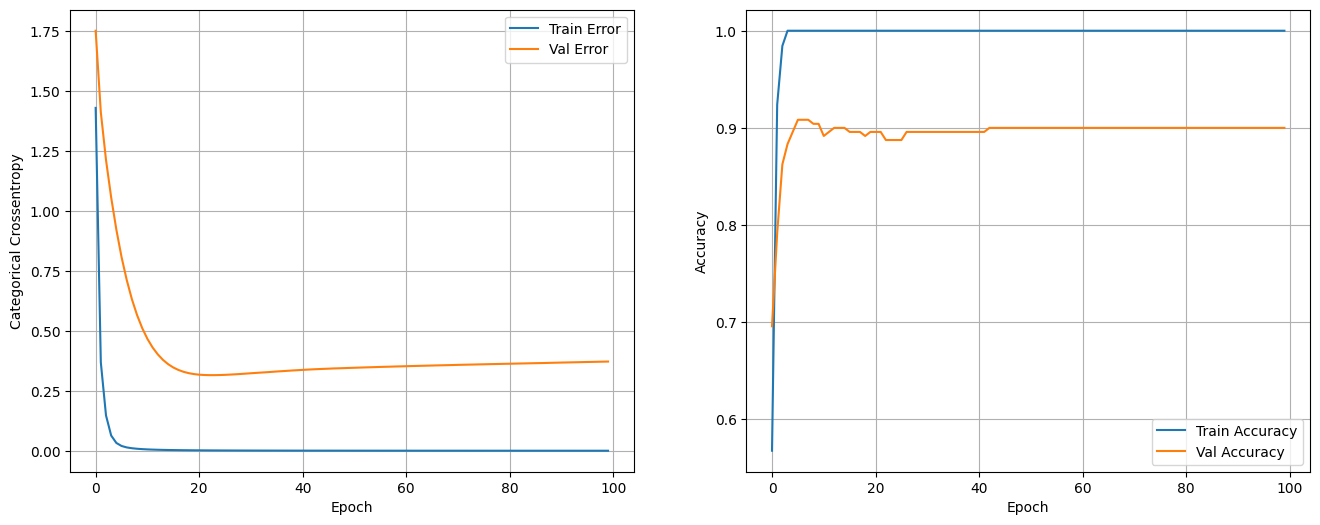

In [63]:
show_loss_accuracy_evolution(history_batch_norm)

In [64]:
results = model_batch_norm.evaluate(x_test, y_test, verbose=0)
print('Test Loss: {}'.format(results[0]))
print('Test Accuracy: {}'.format(results[1]))

Test Loss: 0.40885263681411743
Test Accuracy: 0.8996000289916992


## Layer Normalization

[Layer normalization](https://www.tensorflow.org/api_docs/python/tf/keras/layers/LayerNormalization) is another type of normalization technique. Unlike batch normalization, it normalizes the data across the features and is not dependent on the batch size, making it effective for both training and inference time normalization.

Layer normalization computes the mean and variance used for normalization from all of the summed inputs. It is applied elementwise, i.e., independently to each input in a layer on a single training example.

- With Functional API:
```python
next_layer = layers.LayerNormalization(axis=1)(prev_layer)
```

- With Sequential:
```python
model.add(layers.LayerNormalization(axis=1))
```

In [ ]:
# Input
inputs = tf.keras.Input(shape=(28, 28), name='input_layer')

# Convert the 2D image to a vector
flat = layers.Flatten()(inputs)

# Hidden layer 1
l_1 = layers.Dense(256, activation='relu', name='layer_1')(flat)
l_1 = layers.LayerNormalization(axis=1)(l_1)

# Hidden layer 2
l_2 = layers.Dense(128, activation='relu', name='layer_2')(l_1)
l_2 = layers.LayerNormalization(axis=1)(l_2)

# Hidden layer 3
l_3 = layers.Dense(128, activation='relu', name='layer_3')(l_2)

# Outputs
outputs = layers.Dense(num_classes, activation='softmax', name='output_layer')(l_3)

# Creating Model
model_layer_norm = keras.Model(inputs=inputs, outputs=outputs, name='dont_overfit_model_layer_norm')

In [ ]:
model_layer_norm.compile(
    optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history_layer_norm = model_layer_norm.fit(
    x,
    y,
    batch_size=64,
    epochs=100,
    validation_split=0.2,
    shuffle=True
)

In [ ]:
show_loss_accuracy_evolution(history_layer_norm)

In [ ]:
results = model_layer_norm.evaluate(x_test, y_test, verbose=0)
print('Test Loss: {}'.format(results[0]))
print('Test Accuracy: {}'.format(results[1]))

<a id='l1_l2_elasticnet'></a>
## L1, L2 and ElasticNet

Recordemos que durante el entrenamiento de la red se aprende la configuración de pesos y biases que permita mejorar los resultados para una determinada función de pérdida.

* [L1 regularization](https://developers.google.com/machine-learning/glossary/#L1_regularization), where the cost added is proportional to the absolute value of the weights coefficients ("L1 norm" of the weights).

```python
tf.keras.regularizers.l1(l1=0.01)

layers.Dense(3, kernel_regularizer='l1')

```


* [L2 regularization](https://developers.google.com/machine-learning/glossary/#L2_regularization), where the cost added is proportional to the square of the value of the weights coefficients ( "L2 norm" of the weights).

```python
tf.keras.regularizers.l2(l2=0.01)

layers.Dense(3, kernel_regularizer='l2')

```
* L1_L2 or Elastic Net.

```python
tf.keras.regularizers.l1_l2(
    l1=0.01, l2=0.01
)

layers.Dense(3, kernel_regularizer='l1_l2')

```

Furthermore, it is possible to choose whether to include the penalty in the cost function on the weights, the biases or on the activation, with the following arguments:
- `kernel_regularizer`: only on weights.
- `bias_regularizer`: only on biases.
- `activity_regularizer`: on full output.

[link to documentation](https://keras.io/api/layers/regularizers/).

In [65]:
from tensorflow.keras import regularizers

In [66]:
kerner_regularizer_l1 = regularizers.l1_l2(l1=1e-5, l2=5e-4)
kerner_regularizer_l2 = regularizers.l2(5e-4)
kerner_regularizer_l3 = regularizers.l1(1e-5)

In [67]:

# Input
inputs = tf.keras.Input(shape=(28, 28), name='input_layer')
# Convert the 2D image to a vector
flat = layers.Flatten()(inputs)

# hidden layer 1
l_1 = layers.Dense(256, activation='relu',
                   kernel_regularizer=kerner_regularizer_l1, name='layer_1')(flat)
# hidden layer 2
l_2 = layers.Dense(128, activation='relu',
                   kernel_regularizer=kerner_regularizer_l2, name='layer_2')(l_1)
# hidden layer 3
l_3 = layers.Dense(128, activation='relu',
                   kernel_regularizer=kerner_regularizer_l3, name='layer_3')(l_2)

# Outputs
outputs = layers.Dense(num_classes, activation='softmax',
                       name='output_layer')(l_3)


model_regularizers = keras.Model(inputs=inputs,
                                 outputs=outputs,
                                 name='dont_overfit_model_regularizers')

In [68]:
model_regularizers.summary()

Model: "dont_overfit_model_regularizers"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_1 (Dense)                 │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_3 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 251,658 (983.04 KB)

 Trainable params: 251,658 (983.04 KB)

 Non-trainable params: 0 (0.00 B)

In [69]:
model_regularizers.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [70]:
history_regularizers = model_regularizers.fit(
    x,
    y,
    batch_size=64,
    epochs=100,
    validation_split=0.2,
    shuffle=True
)

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.3861 - loss: 2.4059 - val_accuracy: 0.7708 - val_loss: 1.3643
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8154 - loss: 1.1173 - val_accuracy: 0.8333 - val_loss: 0.8138
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8987 - loss: 0.6565 - val_accuracy: 0.8500 - val_loss: 0.7409
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9266 - loss: 0.5189 - val_accuracy: 0.8458 - val_loss: 0.7513
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9350 - loss: 0.4687 - val_accuracy: 0.8583 - val_loss: 0.7313
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9620 - loss: 0.4004 - val_accuracy: 0.8792 - val_loss: 0.6446
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9726 - loss: 0.3477 - val_accuracy: 0.8792 - val_loss: 0.6107
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9850 - loss: 0.3173 - val_accuracy: 0.

Lets compare the weights norms of the model without regularization and with regularization.

In [71]:
for ly in model.layers:
    if 'layer_' in ly.name:
        W, b = ly.get_weights()
        l2_norm = np.sum(W**2)**0.5
        zero_elems = len(W[np.abs(W) < 1e-14])
        sparsity = zero_elems / np.prod(W.shape)
        sparsity = np.round(100 * sparsity, 2)
        print('L2 norm {0} weights: {1}, shape:{2}, sparsity:{3}'.format(
            ly.name, l2_norm, W.shape,sparsity))

L2 norm layer_1 weights: 43.37125015258789, shape:(784, 256), sparsity:0.0
L2 norm layer_2 weights: 23.07696533203125, shape:(256, 128), sparsity:0.0
L2 norm layer_3 weights: 17.692672729492188, shape:(128, 128), sparsity:0.0


In [72]:
for ly in model_regularizers.layers:
    if 'layer_' in ly.name:
        W, b = ly.get_weights()
        l2_norm = np.sum(W**2)**0.5
        zero_elems = len(W[np.abs(W) < 1e-14])
        sparsity = zero_elems / np.prod(W.shape)
        sparsity = np.round(100 * sparsity, 2)
        print('L2 norm {0} weights: {1}, shape:{2}, sparsity:{3}'.format(
            ly.name, l2_norm, W.shape,sparsity))

L2 norm layer_1 weights: 8.30661392211914, shape:(784, 256), sparsity:0.0
L2 norm layer_2 weights: 7.142666339874268, shape:(256, 128), sparsity:4.79
L2 norm layer_3 weights: 12.364683151245117, shape:(128, 128), sparsity:0.0


In [73]:
for ly in model_batch_norm.layers:
    if 'layer_' in ly.name:
        W, b = ly.get_weights()
        l2_norm = np.sum(W**2)**0.5
        zero_elems = len(W[np.abs(W) < 1e-14])
        sparsity = zero_elems / np.prod(W.shape)
        sparsity = np.round(100 * sparsity, 2)
        print('L2 norm {0} weights: {1}, shape:{2}, sparsity:{3}'.format(
            ly.name, l2_norm, W.shape,sparsity))

L2 norm layer_1 weights: 19.958812713623047, shape:(784, 256), sparsity:0.0
L2 norm layer_2 weights: 13.156801223754883, shape:(256, 128), sparsity:0.0
L2 norm layer_3 weights: 12.208738327026367, shape:(128, 128), sparsity:0.0


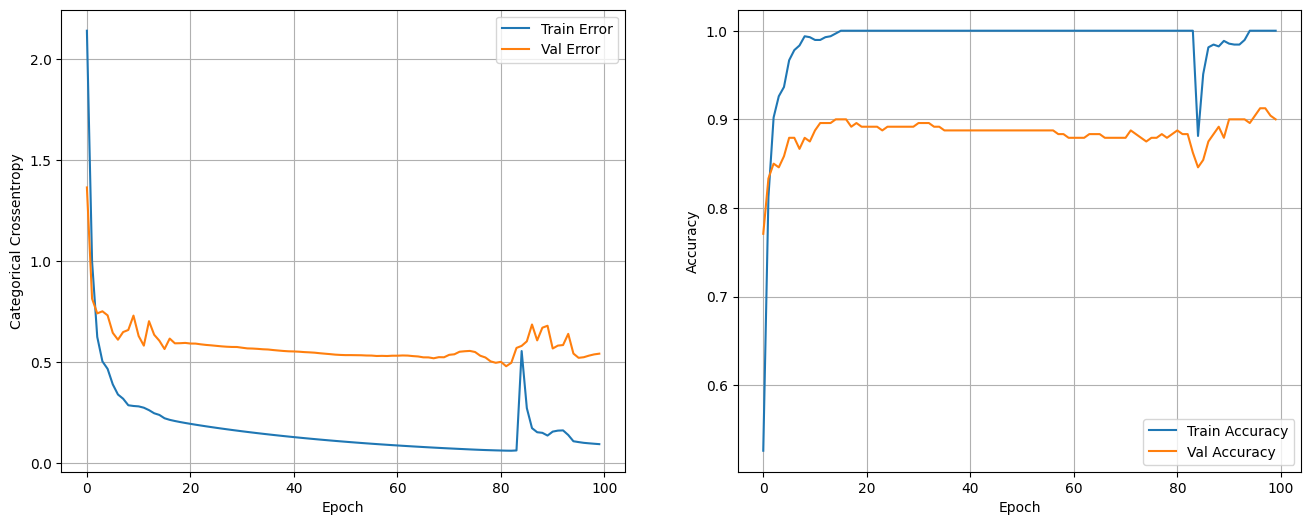

In [74]:
show_loss_accuracy_evolution(history_regularizers)

In [75]:
results = model_regularizers.evaluate(x_test, y_test, verbose=0)
print('Test Loss: {}'.format(results[0]))
print('Test Accuracy: {}'.format(results[1]))

Test Loss: 0.4775816798210144
Test Accuracy: 0.9143000245094299


### Question 3:
#### What happens if you change the regularizers?


In [76]:
# Input
inputs = tf.keras.Input(shape=(28, 28), name='input_layer')
# Convert the 2D image to a vector
flat = layers.Flatten()(inputs)

# hidden layer 1
l_1 = layers.Dense(256, activation='relu',
                   kernel_regularizer=kerner_regularizer_l2, name='layer_1')(flat)
# hidden layer 2
l_2 = layers.Dense(128, activation='relu',
                   kernel_regularizer=kerner_regularizer_l2, name='layer_2')(l_1)
# hidden layer 3
l_3 = layers.Dense(128, activation='relu',
                   kernel_regularizer=kerner_regularizer_l2, name='layer_3')(l_2)

# Outputs
outputs = layers.Dense(num_classes, activation='softmax',
                       name='output_layer')(l_3)


model_regularizers_l2 = keras.Model(inputs=inputs,
                                 outputs=outputs,
                                 name='dont_overfit_model_regularizers_l2')

In [77]:
model_regularizers_l2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [78]:
history_regularizers_l2 = model_regularizers_l2.fit(
    x,
    y,
    batch_size=64,
    epochs=100,
    validation_split=0.2,
    shuffle=True
)

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.3710 - loss: 2.3629 - val_accuracy: 0.7542 - val_loss: 1.3215
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8037 - loss: 1.0935 - val_accuracy: 0.8583 - val_loss: 0.7808
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8805 - loss: 0.6591 - val_accuracy: 0.8542 - val_loss: 0.7439
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9272 - loss: 0.4973 - val_accuracy: 0.8500 - val_loss: 0.7743
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9588 - loss: 0.4429 - val_accuracy: 0.8708 - val_loss: 0.7231
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9614 - loss: 0.3958 - val_accuracy: 0.8708 - val_loss: 0.6936
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9643 - loss: 0.3843 - val_accuracy: 0.8708 - val_loss: 0.6800
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9734 - loss: 0.3456 - val_accuracy: 0.

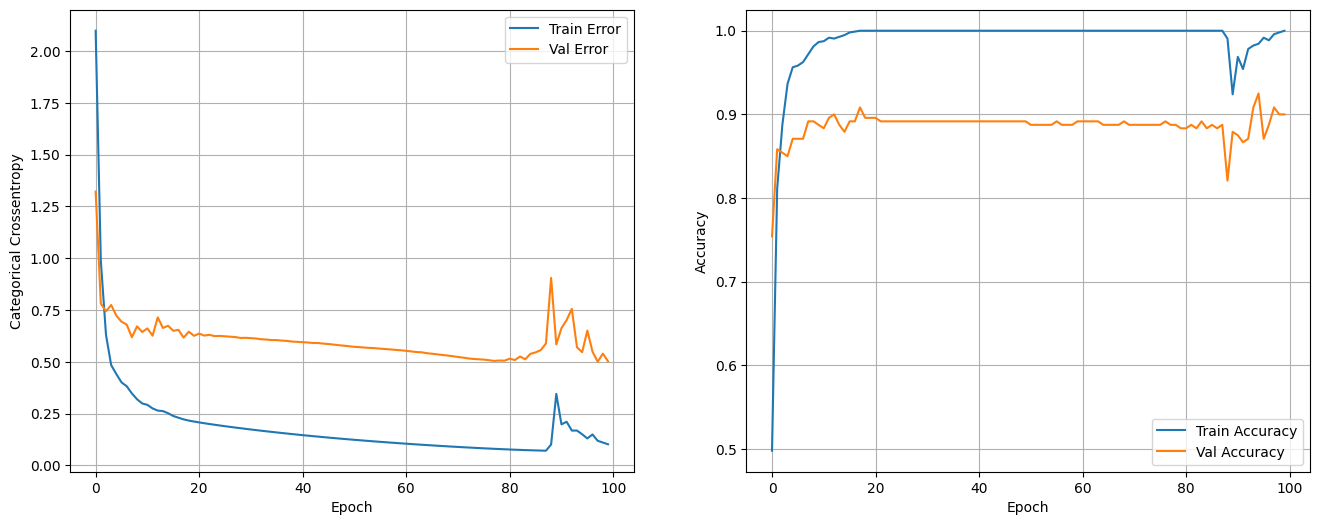

In [79]:
show_loss_accuracy_evolution(history_regularizers_l2)

In [80]:
results = model_regularizers_l2.evaluate(x_test, y_test, verbose=0)
print('Test Loss: {}'.format(results[0]))
print('Test Accuracy: {}'.format(results[1]))

Test Loss: 0.48488691449165344
Test Accuracy: 0.9139000177383423


## Combine L2 Regularization, Dropout, LN BN

Use L2:
```python
kerner_regularizer_l2 = regularizers.l2(5e-4)
```
And Dropout:

```python
next_layer = layers.Dropout(0.4)(prev_layer)
```

In [ ]:
kerner_regularizer_l2 = regularizers.l2(5e-4)

In [87]:
inputs = tf.keras.Input(shape=(28, 28 ), name='input_layer')

# Convert the 2D image to a vector
flat = layers.Flatten()(inputs)

flat = layers.Dropout(0.4, name='dropout_flat')(flat)

# Add L2-normalization layer_1
l_1 = layers.Dense(128, activation='relu',
                   kernel_regularizer=kerner_regularizer_l2,
                   name='layer_1')(flat)
l_1 = layers.LayerNormalization(axis=1)(l_1)
l_1 = layers.BatchNormalization()(l_1)
# Add dropout layer_1
l_1 = layers.Dropout(0.4, name='dropout_l1')(l_1)

# Add L2-normalization layer_2
l_2 = layers.Dense(64,
                   activation='relu',
                   kernel_regularizer=kerner_regularizer_l2,
                   name='layer_2')(l_1)

l_2 = layers.LayerNormalization(axis=1)(l_2)
l_2 = layers.BatchNormalization()(l_2)
# Add dropout layer_2
l_2 = layers.Dropout(0.4, name='dropout_l2')(l_2)

# Add L2-normalization layer_3
l_3 = layers.Dense(32,
                   activation='relu',
                   kernel_regularizer=kerner_regularizer_l2,
                   name='layer_3')(l_2)
l_3 = layers.LayerNormalization(axis=1)(l_3)
l_3 = layers.BatchNormalization()(l_3)

# Add dropout
l_3 = layers.Dropout(0.4, name='dropout_l3')(l_3)


outputs = layers.Dense(num_classes, activation='softmax',
                       name='output_layer')(l_3)

model_combination = keras.Model(inputs=inputs,
                                 outputs=outputs,
                                 name='dont_overfit_model_regularizers')

In [88]:
model_combination.compile(
    optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']
)

In [89]:
history_combination = model_combination.fit(
    x,
    y,
    batch_size=64,
    epochs=100,
    validation_split=0.2,
    shuffle=True
)

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - accuracy: 0.1034 - loss: 3.3594 - val_accuracy: 0.2917 - val_loss: 2.2062
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.1794 - loss: 2.8316 - val_accuracy: 0.4417 - val_loss: 1.6884
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.2308 - loss: 2.5205 - val_accuracy: 0.5625 - val_loss: 1.4225
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.3056 - loss: 2.2009 - val_accuracy: 0.6375 - val_loss: 1.2624
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.3395 - loss: 2.0919 - val_accuracy: 0.7083 - val_loss: 1.1511
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.3809 - loss: 1.9255 - val_accuracy: 0.7500 - val_loss: 1.0470
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.4283 - loss: 1.8329 - val_accuracy: 0.7958 - val_loss: 0.9697
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4539 - loss: 1.7325 - val_accuracy: 0.

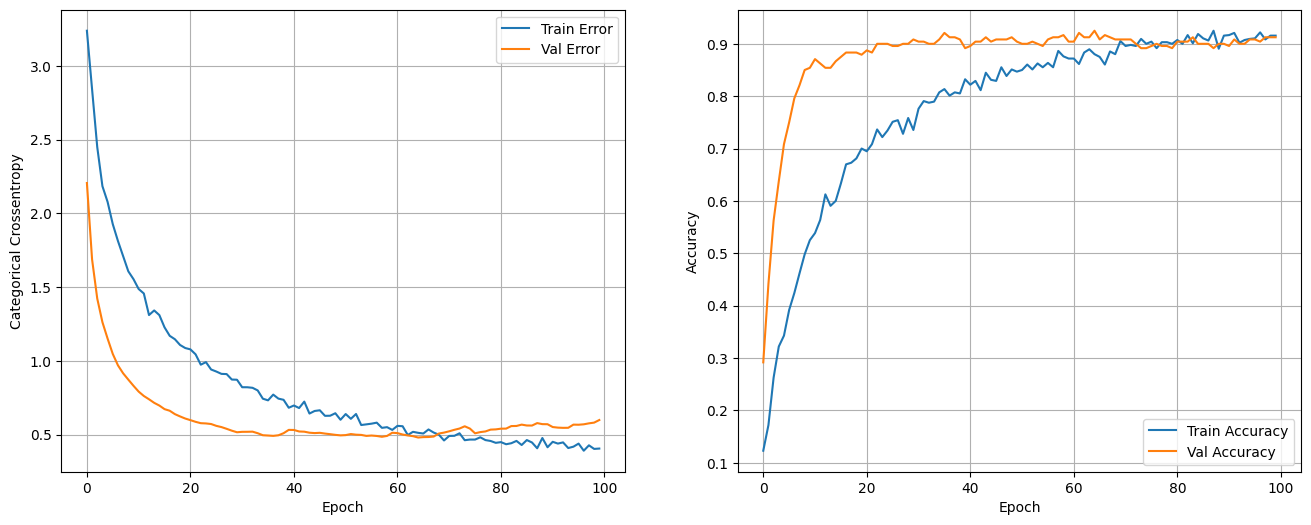

In [90]:
show_loss_accuracy_evolution(history_combination)

In [91]:
results = model_combination.evaluate(x_test, y_test, verbose=0)
print('Test Loss: {}'.format(results[0]))
print('Test Accuracy: {}'.format(results[1]))

Test Loss: 0.5510221123695374
Test Accuracy: 0.904699981212616


## Noise injection

Apply additive zero-mean Gaussian noise.

With Functional API:
```python
next_layer = layers.GaussianNoise(stddev)(prev_layer)
```
With Sequential:
```python
model.add(layers.GaussianNoise(stddev)())
```

In [ ]:
stddev = 2

# Input
inputs = tf.keras.Input(shape=(28,28), name='input_layer')
# Convert the 2D image to a vector
flat = layers.Flatten()(inputs)

# hidden layer 1
l_1 = layers.Dense(256, activation='relu', name='layer_1')(flat)
l_1 = layers.GaussianNoise(stddev, name='noise_l1')(l_1)
# hidden layer 2
l_2 = layers.Dense(128, activation='relu', name='layer_2')(l_1)
l_2 = layers.GaussianNoise(stddev, name='noise_l2')(l_2)
# hidden layer 3
l_3 = layers.Dense(128, activation='relu', name='layer_3')(l_2)
l_3 = layers.GaussianNoise(stddev, name='noise_l3')(l_3)

# Outputs
outputs = layers.Dense(num_classes, activation='softmax', name='output_layer')(l_3)

model_noise = keras.Model(inputs=inputs, outputs=outputs, name='dont_overfit_model_noise')

In [ ]:
model_noise.summary()

In [ ]:
model_noise.compile(
    optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history_noise = model_noise.fit(
    x,
    y,
    batch_size=64,
    epochs=100,
    validation_split=0.2,
    shuffle=True
)

In [ ]:
show_loss_accuracy_evolution(history_noise)

In [ ]:
results = model_noise.evaluate(x_test, y_test, verbose=0)
print('Test Loss: {}'.format(results[0]))
print('Test Accuracy: {}'.format(results[1]))

<a id='early_stopping'></a>
## Early Stopping

Another of the most used techniques in neural network training is **early stopping**. It basically consists of stopping the training process in an Epoch prior to the one defined in the compilation.

This, in addition to resulting in a model with less overfitting, saves unnecessary computation time.

To do this, we can use the [Keras callbacks](https://keras.io/api/callbacks/), objects that perform actions at different times during training. Specifically, we will make use of [`EarlyStopping`](https://keras.io/api/callbacks/early_stopping/).

```python
tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=0,
    restore_best_weights=True,
    verbose=0,
)
```

- **monitor**: Quantity to be monitored. Depending on the evolution, it will be decided to stop training.

- **min_delta**: Minimum change in the monitored quantity to qualify as an improvement, i.e. an absolute change of less than min_delta, will count as no improvement.

- **patience**: Number of epochs with no improvement after which training will be stopped.

- **verbose**: verbosity mode.

There are other callbacks that can be very useful such as:
- [`ModelCheckpoint`](https://keras.io/api/callbacks/model_checkpoint/), which allows storing the state of a model at different times of training. This is very useful in trainings that can take hours or days.
- [`TensorBoard`](https://keras.io/api/callbacks/tensorboard/), which allows the use of [TensorBoard](https://www.tensorflow.org/tensorboard?hl=es-419), framework TensorFlow for visualizing metrics and evaluating models.

In [ ]:
es_callback = keras.callbacks.EarlyStopping(
    monitor='val_loss',  # can be 'val_accuracy'
    patience=5,  # if during 5 epochs there is no improvement in `val_loss`, the execution will stop
    restore_best_weights=True,
    verbose=1)

Lets create the same model:

In [ ]:
# Input
inputs = tf.keras.Input(shape=(28,28), name='input_layer')
# Convert the 2D image to a vector
flat = layers.Flatten()(inputs)

# hidden layer 1
l_1 = layers.Dense(256, activation='relu', name='layer_1')(flat)
# hidden layer 2
l_2 = layers.Dense(128, activation='relu', name='layer_2')(l_1)
# hidden layer 3
l_3 = layers.Dense(128, activation='relu', name='layer_3')(l_2)

# Outputs
outputs = layers.Dense(num_classes, activation='softmax', name='output_layer')(l_3)

model_early_stopping = keras.Model(inputs=inputs, outputs=outputs, name='dont_overfit_model_early_stopping')

In [ ]:
model_early_stopping.summary()

In [ ]:
model_early_stopping.compile(optimizer='adam',
                             loss='sparse_categorical_crossentropy',
                             metrics=['accuracy'])

In [ ]:
history_early_stopping = model_early_stopping.fit(
    x,
    y,
    batch_size=64,
    epochs=100,
    validation_split=0.2,
    shuffle=True,
    callbacks=[es_callback]
)

In [ ]:
show_loss_accuracy_evolution(history_early_stopping)

In [ ]:
results = model_early_stopping.evaluate(x_test, y_test, verbose=0)
print('Test Loss: {}'.format(results[0]))
print('Test Accuracy: {}'.format(results[1]))

<a id='tensorboard'></a>
# TensorBoard



[TensorBoard](https://www.tensorflow.org/tensorboard) is a set of TensorFlow tools that allows us to represent the evolution and results of the training.

In order to introduce this tool, the following is a notebook from the [TensorFlow tutorial on TensorBoard](https://www.tensorflow.org/tensorboard/get_started).

Load TensorBoard notebook extension.

In [ ]:
%load_ext tensorboard

In [ ]:
import tensorflow as tf
import datetime


We build the model. The input layer will have a dimension of `28x28`. The output layer, in a multiclass classification problem with 10 possible classes, will be made up of 10 neurons with [softmax activation function](https://keras.io/api/layers/activations/#softmax-function ).


In [ ]:
kernel_regularizer_l2 = keras.regularizers.l2(5e-4)

model = tf.keras.models.Sequential(name="tensorboard_model")
model.add(layers.Flatten(input_shape=(28, 28)))

# Hidden Layer + regularization
model.add(layers.Dense(64, activation='relu', name='layer_1'))
model.add(layers.Dense(64, activation='relu',
                       kernel_regularizer=kernel_regularizer_l2, name='layer_2'))
# output layer
model.add(layers.Dense(10, activation='softmax', name='output_layer'))

In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In the [example with early stopping](#early_stopping) the Keras callbacks were presented. To use TensorBoard we will need to include the [`TensorBoard` callback](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/TensorBoard) to the training.

This callback will create and store the logs in the directory that we indicate.

By default it will create a directory called "logs" in the directory where this notebook is running.

In [ ]:
log_dir = 'logs/fit/' + datetime.datetime.now().strftime('%Y%m%d-%H%M%S')

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [ ]:
es_callback = keras.callbacks.EarlyStopping(
    monitor='val_loss',  # can be 'val_accuracy'
    patience=10,  # if during 5 epochs there is no improvement in `val_loss`, the execution will stop
    restore_best_weights=True,
    verbose=1)

Train the model

In [ ]:
model.fit(
    x=x_train,
    y=y_train,
    epochs=20,
    validation_split=0.2,
    batch_size=32,
    callbacks=[tensorboard_callback, es_callback]
)

In [ ]:
results = model.evaluate(x_test, y_test, verbose=0)
print('Test Loss: {}'.format(results[0]))
print('Test Accuracy: {}'.format(results[1]))

To ** start TensorBoard ** we can execute the following cell or, from the command line, execute:

    tensorboard --logdir logs / fit

An application will be launched that will be listening by default on port 6006. It is possible to use TensorBoard by opening [localhost: 6006 /](http://localhost:6006/) in a browser.

In [ ]:
%tensorboard --logdir logs/fit

A brief overview of the dashboards shown (tabs in top navigation bar):

* The **Scalars** dashboard shows how the loss and metrics change with every epoch. You can use it to also track training speed, learning rate, and other scalar values.
* The **Graphs** dashboard helps you visualize your model. In this case, the Keras graph of layers is shown which can help you ensure it is built correctly.
* The **Distributions** and **Histograms** dashboards show the distribution of a Tensor over time. This can be useful to visualize weights and biases and verify that they are changing in an expected way.



### Improve the last model with some regularization techniques to obtain at least `0.98` of test accuracy

In [ ]:
model = tf.keras.models.Sequential()
model.add(layers.Flatten(input_shape=(28, 28)))

## Hidden Layer + regularization
model.add(...)
### output layer
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
model.fit(
    x=x_train,
    y=y_train,
    epochs=5,
    validation_split=0.2,
    batch_size=64
)
results = model.evaluate(x_test, y_test, verbose=0)
print('Test Loss: {}'.format(results[0]))
print('Test Accuracy: {}'.format(results[1]))

In [ ]:
model.fit(
    x=x_train,
    y=y_train,
    epochs=...,
    validation_split=0.2,
    batch_size=...,
    callbacks=...
)
results = model.evaluate(x_test, y_test, verbose=0)
print('Test Loss: {}'.format(results[0]))
print('Test Accuracy: {}'.format(results[1]))

### Plotting Predictions

In [ ]:
predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, -1)

In [ ]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize=(14, 14))
axes = axes.ravel()

for i in np.arange(0, L * W):
    ind = np.random.randint(len(y_test))
    axes[i].imshow(x_test[ind].reshape(28, 28))
    prob_pred = np.max(predictions[ind, :])
    class_pred = int(predicted_classes[ind])
    original_class = int(y_test[ind])
    if class_pred == original_class:
        color = 'green'
    else:
        color = 'red'
    title = "Pred: {0} \n Target: {1} \n Prob: {2:.3f}".format(
    class_pred, original_class, prob_pred)
    axes[i].set_title(title, color=color)
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)